# MNIST Digit Classification

This notebook uses the PCA decomposition produced in the project to model a digit classifier.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

## 1. Pre-procesing

- Data Normalization 
- Outlier Removal
- Feature Ranking and Selection 
- Dimensionality Reduction

In [2]:
# Read the generated features data set

df_features = pd.read_csv('new_features.csv')
df_features.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,label
0,404.888091,274.248433,-596.804218,-398.755745,7.447199,160.094468,-219.357891,53.955521,98.801752,102.317404,...,-31.649189,-47.003196,286.706036,36.756460,-275.819706,27.336263,78.599218,12.730552,-69.900146,1
1,-310.553121,-356.874158,43.449491,18.240244,392.227723,57.044642,-342.373177,-172.952708,26.987464,-302.480476,...,166.979171,428.325010,-399.913626,-362.429622,574.247646,140.612070,-139.009964,-100.666126,62.142199,0
2,-38.233669,-71.401235,56.230350,91.409702,-26.702068,23.986721,-126.435546,-54.152914,-22.771694,-18.233032,...,23.447529,-50.734547,192.391058,-170.791895,-119.789871,-20.553701,-103.461581,-101.097052,-15.357540,1
3,28.196891,-155.751974,-35.803444,72.294971,-103.745983,-135.346679,-222.413431,109.933890,-61.898358,142.310437,...,178.425751,-126.082624,145.692001,-252.458151,-155.627146,-181.848174,219.390439,12.920194,-51.823965,4
4,-384.347977,-288.083669,-79.374287,-34.500349,638.036772,-90.796114,-269.153581,8.267971,35.698823,-304.956709,...,69.784839,467.475721,-365.385716,-259.919098,597.024515,346.783335,-223.631365,31.981629,63.258929,0


In [3]:
# Split the data set into 2, features and the class labels

X = df_features.iloc[:,:-1]
Y = df_features['label']

In [4]:
# Starting with Feature ranking and selection
# Calculate the mean, trimmed mean, and standard deviation per species

df_mean = df_features.groupby('label').agg(['mean', 'std'])
df_mean

pca_0                   pca_1                   pca_2              \
             mean         std        mean         std        mean         std   
label                                                                           
0     -403.188901  193.677296  158.197300  395.317620   85.548006  179.670169   
1      128.312444  253.860200   82.056237  162.753303  -95.837773  165.305724   
2      292.279563  266.873642   -0.190937  236.567255  -97.099290  186.784327   
3     -146.522003  256.414307   -2.946650  216.411671 -340.873684  160.903833   
4      120.727567  239.844450  -43.107924  222.453282  160.663887  192.244807   
5     -201.323276  249.888237   75.892370  293.375768  -53.177698  174.932873   
6      -88.351114  241.520418  -46.994364  360.826148  287.476270  217.818060   
7       74.498699  297.831952 -172.040498  153.064324  -24.015339  150.328630   
8      195.296177  269.761801   26.399690  286.669941  -13.681017  213.795448   
9      -20.532851  202.411289  -81.047079  237.809149   97.068540  170.576752   

            pca_3                   pca_4              ...      pca_30  \
             mean         std        mean         std  ...        mean   
label                                                  ...               
0       -2.016581  180.968981  274.594117  248.831514  ...   98.081679   
1      -29.978093  173.646222   14.681545   93.042506  ... -183.614473   
2      -15.962904  257.264589   -3.362085  185.811530  ...  -39.774060   
3       92.675048  160.841310  -40.872873  147.602185  ...   61.064153   
4      -44.090419  164.709084 -149.231415  148.678630  ...   19.521373   
5      -31.315788  158.185820   -6.667390  128.868084  ... -101.839382   
6      -45.793166  187.241643 -211.684515  181.072208  ...  112.264046   
7      279.407474  247.903740   95.777371  177.128097  ...   23.934348   
8     -184.707868  196.873362   28.806149  165.783492  ...  -20.499150   
9      -25.078020  214.749183   -2.206619  133.258879  ...   51.382085   

                       pca_31                  pca_32                  pca_33  \
              std        mean         std        mean         std        mean   
label                                                                           
0      289.008028  112.477599  145.648132   -2.052108  249.298071   44.281561   
1       94.177847  -47.012869   62.471501   -0.613047   83.333289  -22.923784   
2      240.115722   89.179964  210.915683   35.371027  248.483410  -62.793926   
3      239.744332   41.462769  213.126708  116.984779  218.795619  -69.408991   
4      177.829332  140.012218  190.282084    8.738864  134.492993   80.704519   
5      245.926549  -38.912705  309.952217   21.637704  231.969999  -68.840978   
6      238.841266 -162.377972  137.861167  -78.701276  202.287687   -6.263748   
7      139.738407  -68.942322  165.267984  -94.769463  179.618171  -31.944567   
8      223.553401  -16.602025  167.305283   19.490204  174.587963  173.488073   
9      169.127950  -41.382253  207.752484  -19.088334  161.202266  -23.246896   

                      pca_34              
              std       mean         std  
label                                     
0      149.299872  38.090874  159.314530  
1       60.445855 -36.246536   55.936291  
2      193.251075 -67.990988  165.213303  
3      183.827842 -56.940501  260.045084  
4      173.674909  52.171234  112.464246  
5      265.880189  97.535498  197.015295  
6      176.686162  43.579690  203.405775  
7      206.077637 -40.991437  154.776844  
8      169.065498  -2.389740  224.188354  
9      172.406229 -11.381110  128.464298  

[10 rows x 70 columns]

In [5]:
from itertools import combinations
# Use the FDR in a one vs one analysis to select features that contribute the most to class separation. 
# Get all combinations of [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] and length 2

versus = combinations([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 2)
df_fdr = pd.DataFrame(columns=X.columns)
for i,j in versus:
    # Calculating the FDR of each pca feature i vs j
    row = []
    for feature in X.columns:
        mu_i = df_mean[feature]['mean'][i]
        mu_j = df_mean[feature]['mean'][j]
        var_i = df_mean[feature]['std'][i]**2
        var_j = df_mean[feature]['std'][j]**2
        fdr_i_j = (mu_i - mu_j)**2 / (var_i + var_j)
        row.append(fdr_i_j)
    df_fdr.loc[f'{i}v{j}'] = row
df_fdr.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34
0v1,2.770744,0.031721,0.551959,0.012429,0.957215,0.004209,0.051145,0.162363,0.014710,0.049055,...,1.040487,0.019034,2.209417,1.290776,0.165390,0.858841,1.012786,0.000030,0.174088,0.193829
0v2,4.448317,0.118200,0.496653,0.001966,0.801091,0.090427,0.012974,0.078045,0.049902,0.048837,...,0.183807,1.300087,1.043983,0.068906,0.394624,0.134609,0.008262,0.011304,0.192251,0.213631
0v3,0.637986,0.127849,3.125856,0.152961,1.188951,0.024472,0.481980,0.005534,0.025028,0.070329,...,0.183540,0.325633,1.875118,0.165606,0.008697,0.009718,0.075681,0.128792,0.230471,0.097102
0v4,2.888250,0.196945,0.081491,0.029563,2.137858,0.005444,0.301530,0.778098,0.015935,0.121681,...,3.822427,0.080108,4.097299,0.062533,0.121315,0.053598,0.013204,0.001451,0.025292,0.005213
0v5,0.407681,0.027952,0.306042,0.014859,1.007436,0.076015,0.415182,0.331016,0.023798,0.450868,...,0.024580,0.334742,0.543892,0.099496,0.062397,0.277548,0.195415,0.004840,0.137625,0.055045


In [6]:
# Initial analysis of the features that bring the most separation
dmin = min(df_fdr.max(axis=1)) # Takes the max values from every versus and from those take the minimum value (Weakest versus FDR)
cols = [f'pca_{x}'  for x in range(0, 35) if len(df_fdr[df_fdr[f'pca_{x}']>=dmin]) !=0]  # Only taking features with separation greatest than found in the weakest versus
print(len(cols), 'features kept')

# Thease are the top features
df_fdr_top = df_fdr.filter(items=cols)
df_fdr_top.head()

20 features kept


,pca_0,pca_1,pca_2,pca_3,pca_4,pca_6,pca_7,pca_11,pca_15,pca_16,pca_17,pca_18,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_33
0v1,2.770744,0.031721,0.551959,0.012429,0.957215,0.051145,0.162363,0.060776,15.227147,0.011076,0.368115,0.006641,1.040487,0.019034,2.209417,1.290776,0.165390,0.858841,1.012786,0.174088
0v2,4.448317,0.118200,0.496653,0.001966,0.801091,0.012974,0.078045,0.643916,2.317963,0.235194,0.295963,0.319519,0.183807,1.300087,1.043983,0.068906,0.394624,0.134609,0.008262,0.192251
0v3,0.637986,0.127849,3.125856,0.152961,1.188951,0.481980,0.005534,0.104204,4.562296,0.435353,0.477843,0.643963,0.183540,0.325633,1.875118,0.165606,0.008697,0.009718,0.075681,0.230471
0v4,2.888250,0.196945,0.081491,0.029563,2.137858,0.301530,0.778098,0.039380,0.894532,0.971207,0.626631,0.006211,3.822427,0.080108,4.097299,0.062533,0.121315,0.053598,0.013204,0.025292
0v5,0.407681,0.027952,0.306042,0.014859,1.007436,0.415182,0.331016,0.006673,3.145986,0.562648,0.014054,0.090093,0.024580,0.334742,0.543892,0.099496,0.062397,0.277548,0.195415,0.137625


In [7]:
# Ranking the feature kept from the previous step
# Using only the siginificant values (greater than the weakest versus) to calculate the mean per feature
df_fdr_top_ranked = df_fdr_top[df_fdr_top >= dmin].mean().sort_values(ascending=False)
df_fdr_top_ranked

pca_26    3.926725
pca_15    3.830812
pca_25    2.739670
pca_2     2.043277
pca_27    1.808842
pca_0     1.800655
pca_7     1.350468
pca_16    1.338104
pca_29    1.331732
pca_28    1.312715
pca_1     1.293442
pca_31    1.283205
pca_18    1.246955
pca_4     1.241101
pca_11    1.194765
pca_3     1.185107
pca_30    1.183169
pca_17    1.176178
pca_6     1.085156
pca_33    0.996454
dtype: float64

I started with 35 features, then selected the 20 top features with significant separability per Fisher's linear discriminant. Then I ranked the 20 features by how much useful information (disregarding low digit separabilities) it would add to separate features. 

**PCA_26**, **PCA_15**, **PCA_25**, **PCA_2**, and **PCA_27** are the top features.**PCA_25** and **PCA_26** are the first features from the horizontal coefficients. Again, we could divide numbers that could have a horizontal component (1,2,3,4,5,7) and those who don't (0,8,9) **PCA_15** is the first feature from the vertical coefficients, it contains the maximum variance from all the information acquired from verticality. This makes sense since we can divide numbers that could have a vertical component (1,4,5,7,9) and those who don't (0,2,3,8) and most likely **PCA_15** is making use of this fact. 

> Next I'll remove outliers

In [8]:
# Taking the top ranked features
X_filtered = X.filter(items=cols)

In [9]:
def mahalanobis(data, col):
  '''
    Function to calculate the squared Mahalanobis Distance.
    data:   A pandas data frame with the features to calculate the MD2
    Returns the MD^2 = (x-mu)*inv(cov)*(x-mu)^T
  '''
  x = np.array(data)
  x_mu = x - x.mean(axis=0)
  cov = np.cov(x.T)
  inv_cov = np.linalg.inv(cov)
  left = np.dot(x_mu, inv_cov)
  mahal = np.dot(left, x_mu.T)
  mahal = mahal.diagonal()
  return pd.DataFrame(mahal, index=data.index, columns=[col]) # Returns the distance with the same indexes

In [10]:
# Outlier removal using a Wilks outlier removal
# Using the Mahalanobis distance to then remove those with a distance statistically significance
# Implemented the Wilks outlier removal proposed with the Bonferroni correction

md2 = pd.DataFrame(columns=['md2'])
for c in range(0,10):
  md2 = pd.concat([md2, mahalanobis((X_filtered[Y==c]), 'md2')]) 

In [11]:
# Fixed index order and data types
md2 = md2.sort_index()
md2 = md2.astype('float64')

In [12]:
from scipy import stats
# Using a Chi2 test to determine the statistical significance of the md2

md2['p'] = 1 - stats.chi2.cdf(md2['md2'], len(cols)-1) # Using k-1 degrees of freedom.
md2.sort_values(by='md2', ascending=False)

,md2,p
4789,345.849609,0.000000
622,260.171792,0.000000
191,228.685975,0.000000
2284,211.186562,0.000000
4950,191.841780,0.000000
...,...,...
2942,4.400966,0.999779
3423,4.378405,0.999788
3584,4.370533,0.999791
4394,4.363343,0.999793


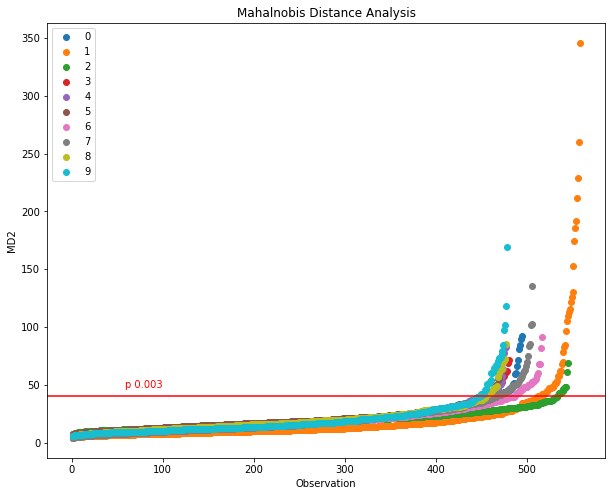

In [13]:
# Ploting the MD2 by class
import matplotlib.transforms as transforms

fig = plt.figure(figsize = (10, 8))
ax = plt.subplot()
for i in range(0, 10):
    plt.scatter(range(1, 1 + len(md2[Y==i])), md2[Y==i].sort_values(by='md2', ascending=True)['md2'], label=i)
    plt.xlabel('Observation')
    plt.ylabel('MD2')
    plt.legend()
ax.axhline(y=md2[md2['p'] < 0.003]['md2'].min(), color="red")
ax.text(100,50, "p 0.003", color="red",  ha="right", va="center")
plt.title('Mahalnobis Distance Analysis')
plt.show()

In [14]:
# Using p 0.003 as the threshold for outliers

X_train = X_filtered[md2['p'] >= 0.003]
y_train = Y[md2['p'] >= 0.003]

After removing outliers I will attempt to prove that all features add to increase the ability to classify the 9 digits. To do so, I will use a support vector machine as base model and a pipeline to normalize and train the models within a 5-fold cross validation. Adding features every iteration, from higher FDR to lower, expecting that each combination will increase the accuracy of the model. If a combination does not increase the accuracy the last feature is dropped. At the end we would expect a better accuracy than if we were to use all features.


In [15]:
# Using the sklearn built in function to split data into 5 folds

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe = Pipeline([
            ('sc', StandardScaler()),
            ('classifier', SVC(kernel = 'rbf'))
])

In [16]:
from sklearn.model_selection import cross_val_score

# 5-Fold Cross Validation using all the top ranked features
accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} ".format(accuracies.std()))

Accuracy: 95.86 %
Standard Deviation: 0.00 


In [17]:
# Foward selection of the top ranked features
current_acc = 0
c_tested  = []
for c in df_fdr_top_ranked.index:
    c_tested.append(c)
    X_f = X_train.filter(items=c_tested)
    accuracies = cross_val_score(estimator = pipe, X = X_f, y = y_train, cv = 5)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    if(accuracies.mean()>=current_acc):
        current_acc = accuracies.mean()
    else:
        print("Dropped", c)
        c_tested.pop()

print(c_tested)
print("Best accuracy: {:.2f} %".format(current_acc*100))

Accuracy: 33.39 %
Accuracy: 45.20 %
Accuracy: 65.15 %
Accuracy: 72.00 %
Accuracy: 80.01 %
Accuracy: 84.83 %
Accuracy: 86.33 %
Accuracy: 87.53 %
Accuracy: 89.77 %
Accuracy: 91.53 %
Accuracy: 93.07 %
Accuracy: 93.47 %
Accuracy: 94.36 %
Accuracy: 94.82 %
Accuracy: 94.61 %
Dropped pca_11
Accuracy: 94.99 %
Accuracy: 95.35 %
Accuracy: 95.54 %
Accuracy: 95.84 %
Accuracy: 95.98 %
['pca_26', 'pca_15', 'pca_25', 'pca_2', 'pca_27', 'pca_0', 'pca_7', 'pca_16', 'pca_29', 'pca_28', 'pca_1', 'pca_31', 'pca_18', 'pca_4', 'pca_3', 'pca_30', 'pca_17', 'pca_6', 'pca_33']
Best accuracy: 95.98 %


## 2. Modeling
- Support Vector Machine (kernel of your choice)
- Random Forest
- Feed Foward NN


I will implement a Suppor Vector Machine, Random Forest and a FFNN to test the best model. Using GridSearchCV I will do the 5-fold cross validation and at the same time I will test different hyperparameters looking for the best combination. For the SVM I will tune C, Kernel and Gamma hyperparameter. For the Random Forest I will tune the ammount of estimators and the criterion.

## 3. Experiment Methodology 
I will use 5-fold cross validation with each of the models chosen. 

### SVM

In [18]:
from sklearn.model_selection import GridSearchCV

# Evaluate if it was better to use all top ranked features or a special combination
if accuracies.mean() <= current_acc:
    X_train = X_train.filter(items=c_tested)

parameters = [{'classifier__C': [0.25, 0.5, 0.75, 1], 'classifier__kernel': ['poly', 'rbf', 'sigmoid',], 'classifier__gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = pipe,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 96.28 %
Best Parameters: {'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
pipe2 = Pipeline([
            ('sc', StandardScaler()),
            ('classifier', RandomForestClassifier(random_state = 0))
])



In [20]:
parameters = [{'classifier__n_estimators': [100, 300, 400, 500, 1000], 'classifier__criterion': ['entropy', 'gini']}]
grid_search = GridSearchCV(estimator = pipe2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 92.73 %
Best Parameters: {'classifier__criterion': 'entropy', 'classifier__n_estimators': 500}


### Feed Foward Neural Network

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow import keras


In [22]:
# Function to create model, required for KerasClassifier
def create_model(hidden_layer_dim):
    # create model
    model = Sequential()
    model.add(Dense(hidden_layer_dim, activation='relu', input_shape=(19,)))
    model.add(Dense(hidden_layer_dim, activation='relu'))
    model.add(Dense(hidden_layer_dim, activation='relu'))
    model.add(Dense(hidden_layer_dim, activation='relu'))
    model.add(Dense(hidden_layer_dim, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [23]:
pipe3 = Pipeline([
            ('sc', StandardScaler()),
            ('classifier', KerasClassifier(model=create_model, verbose=0, hidden_layer_dim=100))
])


In [27]:
parameters = {
    "classifier__batch_size": [32, 64],
    "classifier__epochs": [100],
    "classifier__hidden_layer_dim": [300],
    "classifier__loss": ["categorical_crossentropy"],
    "classifier__optimizer": ["adam"],
    "classifier__optimizer__learning_rate": [0.001],
}

In [28]:
dummy_y = pd.get_dummies(y_train)
dummy_y

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4995,0,0,1,0,0,0,0,0,0,0
4996,0,0,0,0,0,1,0,0,0,0
4997,0,0,0,0,0,0,0,0,1,0
4998,0,0,0,0,0,0,0,1,0,0


In [29]:

# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

grid = GridSearchCV(estimator=pipe3, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, dummy_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

2022-08-22 23:42:08.113517: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-22 23:42:08.113657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-22 23:42:08.113771: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

Best: 0.961537 using {'classifier__batch_size': 64, 'classifier__epochs': 100, 'classifier__hidden_layer_dim': 300, 'classifier__loss': 'categorical_crossentropy', 'classifier__optimizer': 'adam', 'classifier__optimizer__learning_rate': 0.001}
0.961115 (0.005731) with: {'classifier__batch_size': 32, 'classifier__epochs': 100, 'classifier__hidden_layer_dim': 300, 'classifier__loss': 'categorical_crossentropy', 'classifier__optimizer': 'adam', 'classifier__optimizer__learning_rate': 0.001}
0.961537 (0.005785) with: {'classifier__batch_size': 64, 'classifier__epochs': 100, 'classifier__hidden_layer_dim': 300, 'classifier__loss': 'categorical_crossentropy', 'classifier__optimizer': 'adam', 'classifier__optimizer__learning_rate': 0.001}


## 4. Conclusions

The best combination I found was using FDR for feature selection and ranking combined with Mahalanobis distance and standardized normalization. I ran several analyses with the threshold on Mahalanobis distance and the best value was after the elbow from the graph x, at a distance of 40 or a p-value of 0.003. A higher threshold meant that noisy observations were introduced into the 5-fold cross-validation, affecting the accuracy. The best model was the Feed Foward Neural network with 5 hidden layers. The SVM performed extremely well too, with the advantage of lower computational demand. I also tried using the DCT absolute values but the result was significantly worst. 



I chose the FDR, Mahalanobis distance, and Standard normalization because they gave a sound mathematical background. FDR is allowing me to analyze how each feature performs to separate one class from the others. With FDR I was able to rank and select features, reducing by 10 the dimensionality. Mahalanobis distance gives an actual distance in multivariate space, to which I could analyze the outlier. My graph showed how the observations formed an L shape, having an inflection point where the observations exponentially increased the distance. That point was a sound indication of outliers, accounting for a population that was tightly close and another that was separated. 

I chose to test SVM and Random Forest because these were models I've implemented in the past with good results in classification problems. I was interested to see if the FFNN would be able to beat the SVM model with the computing resources at my disposal. Although it did it wasn't easy, I had to run many iterations to find a good architecture of the NN and hyperparameters that would actually be better than the SVM. The difference in accuracy is slight but the compute resource needed was astronomically greater for the NN.

The 5-fold cross-validation with FFNN was very taxing. The combination of testing different hyperparameters and doing the 5-fold was too high of a computational demand for a neural network. I was trying different batch sizes and epochs, while at the same time testing different units per hidden layer. Basically, every hyperparameter, the 5-fold and the epochs could be added to a big O notations of O(n^b) with b in the orders of 1000